In [1]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm") 

In [3]:
cd C:\Users\Hp\Desktop\Data analysis

C:\Users\Hp\Desktop\Data analysis


In [4]:
import requests
from bs4 import BeautifulSoup
import re
import spacy

def scrape_and_clean(url):
    try:
       
        r = requests.get(url)
        r.encoding = 'utf-8'
        html = r.text
        
        
        soup = BeautifulSoup(html, 'html.parser')  
        
       
        text = soup.get_text()
        
       
        clean_text = re.sub(r'[^a-zA-Z0-9\s.]', '', text).replace("\n", " ").replace("/", " ").replace("'", "").lower()
        
        # Using spaCy for tokenization
        nlp = spacy.load("en_core_web_sm")  
        tokens = nlp(clean_text)
        
        # Extracting sentences
        sentences = [sent.text.strip() for sent in tokens.sents]
        
        return sentences
    except Exception as e:
        print(f"Error scraping and cleaning URL {url}: {e}")
        return []

def scrape_and_clean_multiple_urls(urls):
    all_sentences = []
    
    for url in urls:
        sentences = scrape_and_clean(url)
        if sentences:
            # Print the URL once
            print(f"URL: {url}")
            
            # Print the sentences for that URL
            for label, sentence in enumerate(sentences, 1):
                print(f"{label}: {sentence}")
            
            # Add a separator for better readability
            print("\n")
    
    return all_sentences


urls_to_scrape = ["https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/bibhu-mohapatra",
"https://graziamagazine.com/us/articles/nyfw-bibhu-mohapatra-ss24/",
"https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/naeem-khan",
"https://resident.com/2023/09/30/naeem-khan-ss24-collection-nyfw/",
"https://www.lifestyleasia.com/ind/style/fashion/lsa-fashion-files-archana-kochhars-presentation-anant-at-nyfw/",
"https://www.harpersbazaar.in/fashion/story/mayyur-girotras-first-ready-to-wear-capsule-is-genderfluid-and-celebrates-indian-art-633200-2023-08-17",
]
resulting_sentences = scrape_and_clean_multiple_urls(urls_to_scrape)



URL: https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/bibhu-mohapatra
1: bibhu mohapatra spring 2024 readytowear collection  vogueskip to main contentlatest showsseasonsdesignersfeaturedstory savedto revisit this article select my account then view saved storiesclose alertsign inopen navigation menumenubibhu mohapatraspring 2024 readytowearcoveragecollectionby laird borrelliperssonseptember 14 2023facebookxpinterestfacebookxpinterestview slideshowpresenting his spring runway show in his ateliershop for the first time was a bit like inviting people to his home said bibhu mohapatra.
2: everything was up close and personal including most of the clothes which was a plus.the designerwho has a penchant for pointed angles dramatic geometric asymmetries and sharp pleatssoftened things a bit for spring by using curvier lines.
3: waistdefining blazer jackets he noted aimed to borrow from jazz age mens tailoring.
4: this is an era the designer is drawn to often and it resurfaced for 

In [5]:
"https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/bibhu-mohapatra"
"https://graziamagazine.com/us/articles/nyfw-bibhu-mohapatra-ss24/"
"https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/naeem-khan"
"https://resident.com/2023/09/30/naeem-khan-ss24-collection-nyfw/"
"https://www.lifestyleasia.com/ind/style/fashion/lsa-fashion-files-archana-kochhars-presentation-anant-at-nyfw/"
"https://www.harpersbazaar.in/fashion/story/mayyur-girotras-first-ready-to-wear-capsule-is-genderfluid-and-celebrates-indian-art-633200-2023-08-17"


'https://www.harpersbazaar.in/fashion/story/mayyur-girotras-first-ready-to-wear-capsule-is-genderfluid-and-celebrates-indian-art-633200-2023-08-17'

In [5]:
import requests
from bs4 import BeautifulSoup
import spacy
import re

def process_and_label(urls_and_labels, write_first_instance=True):
    def scrape_and_clean(url):
        # Make a request to the URL
        r = requests.get(url)
        r.encoding = 'utf-8'
        html = r.text

        # Creating a BeautifulSoup object from the HTML
        soup = BeautifulSoup(html, 'html.parser')  # You might need to adjust the parser based on the HTML structure

        # Getting the text out of the soup
        text = soup.get_text()

        # Remove all special characters except full stop using regex and convert to lowercase
        clean_text = re.sub(r'[^a-zA-Z0-9\s.]', '', text).replace("\n", " ").replace("/", " ").replace("'", "").lower()

        # Using spaCy for tokenization
        nlp = spacy.load("en_core_web_sm")  # You might need to download this model using: python -m spacy download en_core_web_sm
        tokens = nlp(clean_text)

        # Extracting sentences
        sentences = [sent.text.strip() for sent in tokens.sents]

        return sentences

    def lemmatize_sentence_spacy(sentence):
        doc = nlp(sentence)
        lemmatized_words = [token.lemma_ for token in doc]
        return " ".join(lemmatized_words)

    for url, labels_to_delete in urls_and_labels.items():
        # Call the function for the specified URL
        result_sentences = scrape_and_clean(url)

        # Labeling the sentences
        labeled_sentences = dict(enumerate(result_sentences, 1))

        # Apply lemmatization and filter based on user input
        lemmatized_sentences = {
            label: lemmatize_sentence_spacy(sentence)
            for label, sentence in labeled_sentences.items() if label not in labels_to_delete
        }

        # Combine the remaining sentences into a single string
        remaining_text = "\n".join(lemmatized_sentences.values())

        # Specify the output file path
        output_file_path = "nyfw_l.txt"

        # Determine whether to write or append
        mode = "w" if write_first_instance else "a"

        # Write or append the remaining text to the output file
        with open(output_file_path, mode, encoding="utf-8") as output_file:
            output_file.write(remaining_text)

        print(f"Lemmatized text using spaCy after filtering has been {'written to' if write_first_instance else 'appended to'} {output_file_path} for URL: {url}")



In [7]:
url1= {
    "https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/bibhu-mohapatra": [1, 8, 9, 10, 11, 12],
   
}
process_and_label(url1, write_first_instance=True)

Lemmatized text using spaCy after filtering has been written to nyfw_l.txt for URL: https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/bibhu-mohapatra


In [8]:
url2= {"https://graziamagazine.com/us/articles/nyfw-bibhu-mohapatra-ss24/": [1,2,3,4,5,34,35,36,37,38,39]
    
   
}
process_and_label(url2, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to nyfw_l.txt for URL: https://graziamagazine.com/us/articles/nyfw-bibhu-mohapatra-ss24/


In [9]:
url3= {"https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/naeem-khan": [1,10,12,13,14,15,16]
   
}
process_and_label(url3, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to nyfw_l.txt for URL: https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/naeem-khan


In [10]:
url4= {"https://resident.com/2023/09/30/naeem-khan-ss24-collection-nyfw/": [1,15]
   
}
process_and_label(url4, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to nyfw_l.txt for URL: https://resident.com/2023/09/30/naeem-khan-ss24-collection-nyfw/


In [11]:
url5= {"https://www.lifestyleasia.com/ind/style/fashion/lsa-fashion-files-archana-kochhars-presentation-anant-at-nyfw/":[1,2,40,41,42,43,44,45,46,47,48]
   
}
process_and_label(url5, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to nyfw_l.txt for URL: https://www.lifestyleasia.com/ind/style/fashion/lsa-fashion-files-archana-kochhars-presentation-anant-at-nyfw/


In [12]:
url6= {"https://www.harpersbazaar.in/fashion/story/mayyur-girotras-first-ready-to-wear-capsule-is-genderfluid-and-celebrates-indian-art-633200-2023-08-17":[1,43,44,45]

   
}
process_and_label(url6, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to nyfw_l.txt for URL: https://www.harpersbazaar.in/fashion/story/mayyur-girotras-first-ready-to-wear-capsule-is-genderfluid-and-celebrates-indian-art-633200-2023-08-17


In [25]:
word_list= ["a-line",
"almond-toe shoe",
"appliqué",
"armscye",
"babushka hood",
"banding",
"bar fagoting",
"bar jacket",
"basque",
"basting",
"batwing",
"bias cut",
"bolero",
"beading",
"box jacket",
"box pleats",
"braiding",
"bustle",
"cable smocking",
"cap sleeves",
"capsule collections",
"cartridge pleats",
"circular cut",
"cone heel",
"cowl neckline",
"cross-stitch",
"crow's feet",
"cruise collection",
"curved seams",
"darts",
"dégradé",
"diamond smocking",
"dirndl",
"drape",
"embroidery",
"handembroidered",
"empire line",
"epaulet",
"eyelets",
"facing fabric",
"fagoting",
"faux pas",
"feather stitch",
"filigree",
"flounce",
"fringe",
"futuristic",
"fluted hem",
"frog fastenings",
"gaiter",
"gathering",
"gaucho",
"godet pleat",
"gore",
"gusset",
"handkerchief hems",
"harem pants",
"handmade",
"haute couture",
"hems",
"herringbone",
"hobble skirt",
"interfacing",
"interlining",
"jabots",
"jacquard",
"kangaroo pockets",
"keyhole neckline",
"kick pleats",
"kimonos",
"knife pleat",
"knotting",
"lace",
"lettuce hem",
"lining",
"look-books",
"mad as a hatter",
"mandarin collar",
"mary jane",
"mermaid line",
"millinery",
"mitre",
"mitre corners",
"napping",
"necklines",
"ombre",
"outré",
"overcasting",
"overlay",
"paper-bag waistbands",
"passé",
"passementerie edging",
"patch pockets",
"patchwork",
"peignoir",
"peplum",
"peter pan collar",
"petticoats",
"piping",
"pleats",
"plissé",
"portiere",
"power dressing",
"princess line",
"puckered",
"puffed sleeves",
"quilting",
"raglan sleeve",
"revers",
"rickrack",
"ruching",
"ruffle",
"sartorial",
"scalloped technique",
"seersucker",
"sequined",
"sheath line",
"shell hems",
"stiletto heels",
"sheer",
"sequins",
"sequin",
"sari",
"sweetheart necklines",
"tailoring",
"tailored", 
"tapered",
"trapeze line",
"trompe l'oeil",
"turtleneck",
"uniforms",
"unpressed pleats",
"alizarin",
"amaranth",
"amber",
"amethyst",
"apricot",
"aqua",
"aquamarine",
"asparagus",
"auburn",
"azure",
"beige",
"bistre",
"black",
"blue",
"blue green",
"blue violet",
"bondi blue",
"brass",
"bronze",
"brown",
"buff",
"burgundy",
"burnt orange",
"burnt sienna",
"burnt umber",
"camouflage green",
"caput mortuum",
"cardinal",
"carmine",
"carrot orange",
"celadon",
"cerise",
"cerulean",
"champagne",
"charcoal",
"chartreuse",
"cherry blossom pink",
"chestnut",
"chocolate",
"cinnabar",
"cinnamon",
"cobalt",
"copper",
"coral",
"corn",
"cornflower",
"cream",
"crimson",
"cyan",
"dandelion",
"denim",
"ecru",
"emerald",
"eggplant",
"falu red",
"fern green",
"firebrick",
"flax",
"forest green",
"french rose",
"fuchsia",
"gamboge",
"golden",      
"goldenrod",
"green",
"grey",
"han purple",
"harlequin",
"heliotrope",
"hollywood cerise",
"indigo",
"ivory",
"jade",
"kelly green",
"khaki",
"lavender",
"lawn green",
"lemon",
"lemon chiffon",
"lilac",
"lime",
"lime green",
"linen",
"magenta",
"magnolia",
"malachite",
"maroon",
"mauve",
"midnight blue",
"mint green",
"misty rose",
"moss green",
"mustard",
"myrtle",
"navajo white",
"navy blue",
"ochre",
"olive",
"olivine",
"orange",
"orchid",
"papaya whip",
"peach",
"pear",
"periwinkle",
"persimmon",
"pine green",
"pink",
"platinum",
"plum",
"powder blue",
"puce",
"prussian blue",
"psychedelic purple",
"pumpkin",
"purple",
"quartz grey",
"raw umber",
"razzmatazz",
"red",
"robin egg blue",
"rose",
"royal blue",
"royal purple",
"ruby",
"russet",
"rust",
"safety orange",
"saffron",
"salmon",
"sandy brown",
"sangria",
"sapphire",
"scarlet",
"sea green",
"seashell",
"sepia",
"shamrock green",
"shocking pink",
"silver",
"sky blue",
"slate grey",
"smalt",
"spring bud",
"spring green",
"steel blue",
"tan",
"tangerine",
"taupe",
"teal",
"tenné (tawny)",
"terra cotta",
"thistle",
"titanium white",
"tomato",
"turquoise",
"tyrian purple",
"ultramarine",
"van dyke brown",
"vermilion",
"violet",
"viridian",
"wheat",
"white",
"wisteria",
"xanthic",
"yellow",
"zucchini",
"aertex",
"alençon lace",
"antique satin",
"argentan lace",
"argentella lace",
"bafta cloth",
"baize",
"ballistic nylon",
"barathea",
"barkcloth",
"batik",
"batiste",
"battenberg lace",
"bedford cord",
"bengaline silk",
"beta cloth",
"bobbinet",
"boiled wool",
"bombazine",
"bouclé",
"brilliantine",
"broadcloth",
"brocade",
"broderie anglaise",
"buckram",
"burano lace",
"buratto lace",
"burlap",
"c change",
"calico",
"cambric",
"camel's hair",
"camlet",
"canvas",
"capilene",
"carrickmacross lace",
"challis",
"chantilly lace",
"char cloth",
"charmeuse",
"charvet",
"cheesecloth",
"chenille",
"chiengora",
"chiffon",
"chino",
"chintz",
"cloqué",
"cloth of gold",
"coolmax",
"cordura",
"corduroy",
"cotton duck",
"crash (fabric)",
"crepe",
"crêpe de chine",
"cretonne",
"crochet",
"damask",
"darlexx",
"denim",
"dimity",
"dobby",
"donegal tweed",
"dotted swiss",
"double cloth",
"dowlas",
"drill",
"drugget",
"duck",
"dupioni silk",
"dungarees",
"dyneema",
"eolienne",
"faux fur",
"faux leather",
"felt",
"filet/lacis lace",
"fishnet",
"flannel",
"flannelette",
"foulard",
"fustian",
"gabardine",
"gannex",
"gauze",
"gazar",
"georgette",
"ghalamkar",
"gingham",
"gore-tex",
"grenadine",
"grenfell cloth",
"grosgrain",
"habutai",
"halas lace",
"haircloth",
"harris tweed",
"hessian",
"herringbone",
"himro",
"hodden",
"holland cloth",
"hollie point lace",
"houndstooth check",
"intarsia",
"interlock jersey",
"jacquard knit",
"jamdani",
"jersey",
"lace",
"lamé",
"lampas",
"lantana",
"lanon",
"lawn cloth",
"leather",
"leatherette",
"limerick lace",
"linen",
"linsey-woolsey",
"loden",
"longcloth",
"lycra",
"mackinaw",
"madapollam",
"madras",
"matelassé",
"melton",
"mesh",
"milliskin",
"mockado",
"moire",
"moleskin",
"monk's cloth",
"moquette",
"mouflon",
"mousseline",
"muslin",
"micro",
"nankeen",
"neoprene",
"net",
"oilskin",
"organdy",
"organza",
"osnaburg",
"ottoman",
"oxford",
"paduasoy",
"panné velvet",
"peau de soie",
"percale",
"piqué",
"pleated linen",
"plissé",
"plush",
"point de france lace",
"point de gaze lace",
"point de venise lace",
"polar fleece",
"pongee",
"poplin",
"punto in aria lace",
"rakematiz",
"rayadillo",
"rayon",
"rep",
"reticella lace",
"rib knit",
"rinzu",
"ripstop",
"russell cord",
"saga nishiki",
"sailcloth",
"samite",
"sateen",
"satin",
"saye",
"scarlet",
"scrim",
"seersucker",
"serge",
"shantung",
"sharkskin",
"shot silk",
"silnylon",
"songket",
"stockinette",
"stuff",
"suede",
"surah",
"swanskin cloth",
"sympatex",
"taffeta",
"tais",
"tambour lace",
"toile",
"tapestry",
"tartan",
"teneriffe lace",
"terrycloth",
"tricot",
"terry velour",
"tulle",
"tweed",
"twill",
"ultrasuede",
"velour",
"velours du kasaï",
"velvet",
"velveteen",
"venetian lace",
"ventile",
"vinyl coated polyester (pvc)",
"viyella",
"voile",
"wadmal",
"whipcord",
"wigan",
"worsted wool",
"youghal lace",
"zephyr",
"zibeline",
"zorbeez",
"abstract ",
"african ",
" airbrush ",
"animal ",
"basket weave ",
"batik ",
"bird’s eye ",
"bull’s eye ",
"bohemian fabric ",
"brick network ",
"camouflage ",
"coin dot ",
"celtic knot ",
"checkered ",
"chinoserie ",
"cloverleaf ",
"ditsy ",
"dotted swiss ",
"damask ",
"diagonal ",
"designer ",
"drape",
"diamond ",
"digital ",
"fleur de lis ",
"floral ",
"fret ",
"graphic ",
"geometric ",
"hawaiian ",
"hexagonal ",
"half drop ",
"herringbone ",
"harlequin ",
"illusion ",
"ikat ",
"indian ",
"jacobean ",
"landscape ",
"lattice ",
"metallese ",
"natural ",
"network ",
"nursery ",
"ogee ",
"oriental ",
"patriotic ",
"paisley ",
"palmette ",
"polka dot ",
"pin dot ",
"provencal ",
]

In [26]:
import pandas as pd

# Replace 'text_document.txt' with the actual name of your text document
NYFW = 'nyfw_l.txt'

# Read the entire text file as a single column in a DataFrame
df = pd.read_csv(NYFW, header=None, names=['Text'], sep='\t', lineterminator='\n', encoding='utf-8')

# Print the DataFrame
print("Text Document DataFrame:")
print(df)


Text Document DataFrame:
                                                  Text
0    everything be up close and personal include mo...
1    waistdefine blazer jacket he note aim to borro...
2    this be an era the designer be draw to often a...
3    there be a lot of fringe as well.leade the pat...
4    mohapatra say he want to create a bridge betwe...
..                                                 ...
124  mg I work very closely with kutch and kashmiri...
125  we have use these technique since the inceptio...
126  in this particular collection you will notice ...
127  it scream india it scream art it scream our cu...
128  and yet the piece be modern and friendly for a...

[129 rows x 1 columns]


Filtered Word Frequency:
{'beading': 2, 'drape': 7, 'embroidery': 7, 'handembroidered': 2, 'overlay': 2, 'sheer': 5, 'sequin': 2, 'sari': 3, 'black': 7, 'golden': 3, 'pink': 4, 'silver': 3, 'yellow': 2, 'brocade': 2, 'tulle': 3}


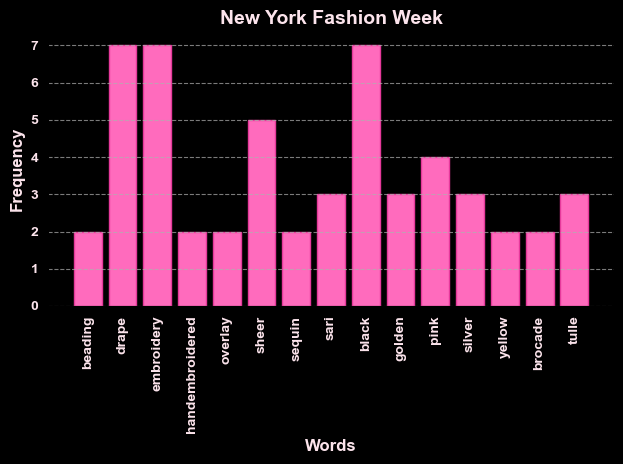

In [45]:
import os
import pandas as pd

def count_word_frequency(text_document, word_list):
    """
    Count the frequency of words from the given list in the text document.

    Parameters:
    - text_document (str): The input text document.
    - word_list (list): The list of words to match and count.

    Returns:
    - dict: A dictionary containing word-frequency pairs.
    """
    # Tokenize the text document into words
    words_in_document = text_document.lower().split()

    # Count the frequency of each word in the text document for the specified list
    word_frequency = {word: words_in_document.count(word) for word in word_list}

    return word_frequency

# Specify the filename of your text document
file_name = "nyfw_l.txt"

# Read the contents of the text document
with open(file_name, 'r', encoding='utf-8') as file:
    document_content = file.read()

if document_content:
    # Specify your list of words
    word_list

    # Count the frequency of words in the specified list
    result = count_word_frequency(document_content, word_list)

    # Filter out values greater than 1
    filtered_result = {word: count for word, count in result.items() if count > 1}

    # Print the filtered word frequency
    print("Filtered Word Frequency:")
    print(filtered_result)




font = {'family': 'Arial', 'weight': 'bold', 'size': 12}

# Set the font family and weight for the entire plot
plt.rc('font', **font)

background_color = '#000000'  # Black background
fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Adjusted bar colors and added edge color for better visibility
plt.bar(filtered_result.keys(), filtered_result.values(), color='#FF6BBD', edgecolor='#E6399B')

# Set font color to light pink
font_color = '#FCE4EC'

plt.xlabel('Words', fontsize=12, color=font_color, weight='bold')
plt.ylabel('Frequency', fontsize=12, color=font_color, weight='bold')
plt.title('New York Fashion Week', fontsize=14, fontweight='bold', color=font_color)  # Improved title styling
plt.xticks(rotation='vertical', fontsize=10, color=font_color, weight='bold')

# Set the y-axis tick positions and labels
plt.yticks(fontsize=10, color=font_color, weight='bold')

# Added grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


PARIS FASHION WEEK

In [18]:
urls_to_scrape = [ "https://www.vogue.com/fashion-shows/fall-2023-couture/rahul-mishra",
"https://www.vogue.in/fashion/content/first-look-gaurav-gupta-showcases-couture-in-paris-for-the-first-time",
"https://www.firstpost.com/entertainment/from-rahul-mishra-to-gaurav-gupta-indian-fashion-designers-who-showed-their-collections-at-paris-haute-couture-week-12165582.html#:~:text=The%20names%20are%20Gaurav%20Gupta%2C%20Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.&text=Did%20you%20know%20it%20took,Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.",
"https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/",
"https://www.scmp.com/lifestyle/fashion-beauty/article/3210117/luxury-fashions-worst-kept-secret-and-indian-designers-reclaiming-what-it-means-make-haute-couture",

]
resulting_sentences = scrape_and_clean_multiple_urls(urls_to_scrape)



URL: https://www.vogue.com/fashion-shows/fall-2023-couture/rahul-mishra
1: rahul mishra fall 2023 couture collection  vogueskip to main contentlatest showsseasonsdesignersfeaturedstory savedto revisit this article select my account then view saved storiesclose alertsign inopen navigation menumenurahul mishrafall 2023 couturecoveragecollectionby tiziana cardinijuly 3 2023facebookxpinterestfacebookxpinterestview slideshowin the vast courtyard of la monnaie de paris where rahul mishra held his couture show today two indian master artisans sat in opposite corners each protected from the blazing sun by a canopy of lush foliage while patiently embroidering beautiful naturalistic motifs on a panel and on a flimsy veil.
2: they seemed completely absorbed by their craft oblivious to the heat and to the chirping swarm of indian celebrities and socialites attending the show.
3: theyre almost in a meditative state said mishra.
4: probably they inhabit the forests the lotus ponds they have conversa

In [19]:
p_url1 = "https://www.vogue.com/fashion-shows/fall-2023-couture/rahul-mishra"
p_url2 = "https://www.vogue.in/fashion/content/first-look-gaurav-gupta-showcases-couture-in-paris-for-the-first-time"
p_url3 = "https://www.firstpost.com/entertainment/from-rahul-mishra-to-gaurav-gupta-indian-fashion-designers-who-showed-their-collections-at-paris-haute-couture-week-12165582.html#:~:text=The%20names%20are%20Gaurav%20Gupta%2C%20Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.&text=Did%20you%20know%20it%20took,Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule."
p_url4 = "https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/"
p_url5 = "https://www.scmp.com/lifestyle/fashion-beauty/article/3210117/luxury-fashions-worst-kept-secret-and-indian-designers-reclaiming-what-it-means-make-haute-couture"


In [20]:
def process_and_label(urls_and_labels, write_first_instance=True):
    def scrape_and_clean(url):
        # Make a request to the URL
        r = requests.get(url)
        r.encoding = 'utf-8'
        html = r.text

        # Creating a BeautifulSoup object from the HTML
        soup = BeautifulSoup(html, 'html.parser')  # You might need to adjust the parser based on the HTML structure

        # Getting the text out of the soup
        text = soup.get_text()

        # Remove all special characters except full stop using regex and convert to lowercase
        clean_text = re.sub(r'[^a-zA-Z0-9\s.]', '', text).replace("\n", " ").replace("/", " ").replace("'", "").lower()

        # Using spaCy for tokenization
        nlp = spacy.load("en_core_web_sm")  # You might need to download this model using: python -m spacy download en_core_web_sm
        tokens = nlp(clean_text)

        # Extracting sentences
        sentences = [sent.text.strip() for sent in tokens.sents]

        return sentences

    def lemmatize_sentence_spacy(sentence):
        doc = nlp(sentence)
        lemmatized_words = [token.lemma_ for token in doc]
        return " ".join(lemmatized_words)

    for url, labels_to_delete in urls_and_labels.items():
        # Call the function for the specified URL
        result_sentences = scrape_and_clean(url)

        # Labeling the sentences
        labeled_sentences = dict(enumerate(result_sentences, 1))

        # Apply lemmatization and filter based on user input
        lemmatized_sentences = {
            label: lemmatize_sentence_spacy(sentence)
            for label, sentence in labeled_sentences.items() if label not in labels_to_delete
        }

        # Combine the remaining sentences into a single string
        remaining_text = "\n".join(lemmatized_sentences.values())

        # Specify the output file path
        output_file_path = "pfw_l.txt"

        # Determine whether to write or append
        mode = "w" if write_first_instance else "a"

        # Write or append the remaining text to the output file
        with open(output_file_path, mode, encoding="utf-8") as output_file:
            output_file.write(remaining_text)

        print(f"Lemmatized text using spaCy after filtering has been {'written to' if write_first_instance else 'appended to'} {output_file_path} for URL: {url}")


In [21]:
p_url1= {"https://www.vogue.com/fashion-shows/fall-2023-couture/rahul-mishra":
     [1,16,17,18,19,20,21],
   
}
process_and_label(p_url1, write_first_instance=True)


Lemmatized text using spaCy after filtering has been written to pfw_l.txt for URL: https://www.vogue.com/fashion-shows/fall-2023-couture/rahul-mishra


In [22]:
p_url2 = {"https://www.vogue.in/fashion/content/first-look-gaurav-gupta-showcases-couture-in-paris-for-the-first-time": [1,17,35,48,51, 70,71,72,73],}
process_and_label(p_url2, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to pfw_l.txt for URL: https://www.vogue.in/fashion/content/first-look-gaurav-gupta-showcases-couture-in-paris-for-the-first-time


In [23]:
p_url3 = { "https://www.firstpost.com/entertainment/from-rahul-mishra-to-gaurav-gupta-indian-fashion-designers-who-showed-their-collections-at-paris-haute-couture-week-12165582.html#:~:text=The%20names%20are%20Gaurav%20Gupta%2C%20Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.&text=Did%20you%20know%20it%20took,Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.": [1,2,3,4,8,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37],}
process_and_label(p_url3, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to pfw_l.txt for URL: https://www.firstpost.com/entertainment/from-rahul-mishra-to-gaurav-gupta-indian-fashion-designers-who-showed-their-collections-at-paris-haute-couture-week-12165582.html#:~:text=The%20names%20are%20Gaurav%20Gupta%2C%20Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.&text=Did%20you%20know%20it%20took,Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.


In [24]:
p_url4 = {"https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/":  [1,26,27,28,29,30,31],}
process_and_label(p_url4, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to pfw_l.txt for URL: https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/


In [25]:
p_url5 = {"https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/": [1,18,19],}
process_and_label(p_url5, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to pfw_l.txt for URL: https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/


In [22]:
import pandas as pd

# Replace 'text_document.txt' with the actual name of your text document
PFW = 'pfw_l.txt'

# Read the entire text file as a single column in a DataFrame
df = pd.read_csv(PFW, header=None, names=['Text'], sep='\t', lineterminator='\n', encoding='utf-8')

# Print the DataFrame
print("Text Document DataFrame:")
print(df)


Text Document DataFrame:
                                                  Text
0    they seem completely absorb by their craft obl...
1    they re almost in a meditative state say mishr...
2    probably they inhabit the forest the lotus pon...
3    who know which parallel universe their fantasy...
4    the work we do belong to all of we to all the ...
..                                                 ...
133  we discuss the look and work out the detail to...
134  for lizzo it be a big moment for her own docum...
135  but the main difference between the stylist be...
136  they will push the boundary from one look to t...
137  all this have start for a while in bollywood a...

[138 rows x 1 columns]


Filtered Word Frequency:
{'embroidery': 5, 'handembroidered': 5, 'futuristic': 3, 'sartorial': 2, 'black': 2, 'blue': 2, 'pink': 5, 'red': 2}


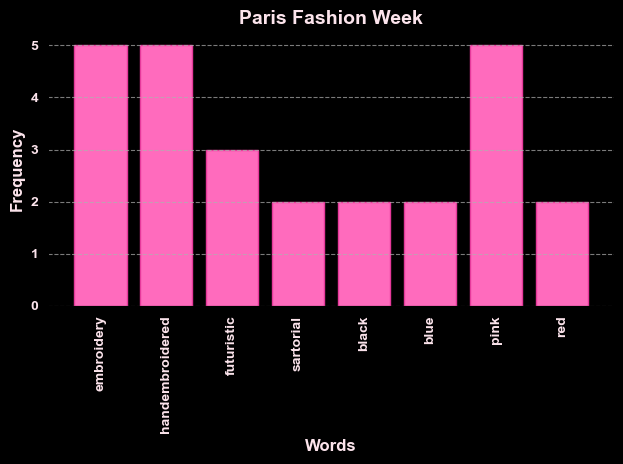

In [46]:
import os
import pandas as pd

def count_word_frequency(text_document, word_list):
    """
    Count the frequency of words from the given list in the text document.

    Parameters:
    - text_document (str): The input text document.
    - word_list (list): The list of words to match and count.

    Returns:
    - dict: A dictionary containing word-frequency pairs.
    """
    # Tokenize the text document into words
    words_in_document = text_document.lower().split()

    # Count the frequency of each word in the text document for the specified list
    word_frequency = {word: words_in_document.count(word) for word in word_list}

    return word_frequency

# Specify the filename of your text document
file_name = "pfw_l.txt"

# Read the contents of the text document
with open(file_name, 'r', encoding='utf-8') as file:
    document_content = file.read()

if document_content:
    # Specify your list of words
    word_list

    # Count the frequency of words in the specified list
    result = count_word_frequency(document_content, word_list)

    # Filter out values greater than 1
    filtered_result = {word: count for word, count in result.items() if count > 1}

    # Print the filtered word frequency
    print("Filtered Word Frequency:")
    print(filtered_result)

font = {'family': 'Arial', 'weight': 'bold', 'size': 12}

# Set the font family and weight for the entire plot
plt.rc('font', **font)

background_color = '#000000'  # Black background
fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Adjusted bar colors and added edge color for better visibility
plt.bar(filtered_result.keys(), filtered_result.values(), color='#FF6BBD', edgecolor='#E6399B')

# Set font color to light pink
font_color = '#FCE4EC'

plt.xlabel('Words', fontsize=12, color=font_color, weight='bold')
plt.ylabel('Frequency', fontsize=12, color=font_color, weight='bold')
plt.title('Paris Fashion Week', fontsize=14, fontweight='bold', color=font_color)  # Improved title styling
plt.xticks(rotation='vertical', fontsize=10, color=font_color, weight='bold')

# Set the y-axis tick positions and labels
plt.yticks(fontsize=10, color=font_color, weight='bold')

# Added grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


LONDON FASHION WEEK

In [30]:
urls_to_scrape = ["https://www.vogue.in/content/at-london-fashion-week-indian-designers-shone-bright",
"https://www.theguardian.com/fashion/2023/mar/19/my-designs-create-joy-and-im-grateful-for-that-ashish-gupta-fashion-sequins",     
"https://www.vogue.com/fashion-shows/spring-2023-ready-to-wear/supriya-lele#review",
"https://www.harpersbazaar.com/fashion/fashion-week/a45224620/supriya-lele-london-fashion-week-spring-2024/",
"https://www.harpersbazaar.in/fashion/story/ahead-of-his-second-showcase-at-london-fashion-week-2023-designer-harri-talks-about-what-it-takes-to-drop-a-viral-collection-565168-2023-02-13",
"https://graziamagazine.com/articles/ahluwalia-fw-23/#:~:text=Debuting%20as%20part%20of%20London,most%20influenced%20the%20designer's%20childhood.",
"https://www.vogue.com/fashion-shows/fall-2023-ready-to-wear/ahluwalia-studio",


]
resulting_sentences = scrape_and_clean_multiple_urls(urls_to_scrape)

URL: https://www.vogue.in/content/at-london-fashion-week-indian-designers-shone-bright
1: at london fashion week indian designers shone bright  vogue indiaskip to main contentopen navigation menumenustory savedto revisit this article visit my profile then view saved storiesclose alertsearchsearchfashionbeautyvogue closetculturehoroscopewedding wardrobevideoopen navigation menumenustory savedto revisit this article visit my profile then view saved storiesclose alertfashionat london fashion week indian designers shone brightfrom the bold moves of harri to the sequinned exhilaration at ashish the diaspora took the spotlight by  divya venkataraman21 september 2023credits keerthana kunnathharrion the first day of london fashion week as the city settled into the highvelocity reality of its next few days three dancers in latex crops and ballooning inflatable pants ducked and wove around each other on the runway at the old selfridges hotel.
2: guests of harri the label by keralaborn londonbase

In [31]:
l_url1 = {"https://www.vogue.in/content/at-london-fashion-week-indian-designers-shone-bright": [1,5,18,47,48,49,50]}
l_url2 = {"https://www.theguardian.com/fashion/2023/mar/19/my-designs-create-joy-and-im-grateful-for-that-ashish-gupta-fashion-sequins":
          [1,2,3,5,101]}
l_url3 = {"https://www.vogue.com/fashion-shows/spring-2023-ready-to-wear/supriya-lele#review": [1,15,16,17,18,19,20,21]}
l_url4 = {"https://www.harpersbazaar.com/fashion/fashion-week/a45224620/supriya-lele-london-fashion-week-spring-2024/":[24]}
l_url5 = {"https://www.harpersbazaar.in/fashion/story/ahead-of-his-second-showcase-at-london-fashion-week-2023-designer-harri-talks-about-what-it-takes-to-drop-a-viral-collection-565168-2023-02-13":[1,2,81]}
l_url6 = {"https://graziamagazine.com/articles/ahluwalia-fw-23/#:~:text=Debuting%20as%20part%20of%20London,most%20influenced%20the%20designer's%20childhood.":[1,2,3,4,5,20,21,22]}
l_url7 = {"https://www.vogue.com/fashion-shows/fall-2023-ready-to-wear/ahluwalia-studio":[1,13,14,15,16,17,18,19,20,21,22]}



In [32]:
def process_and_label(urls_and_labels, write_first_instance=True):
    def scrape_and_clean(url):
        # Make a request to the URL
        r = requests.get(url)
        r.encoding = 'utf-8'
        html = r.text

        # Creating a BeautifulSoup object from the HTML
        soup = BeautifulSoup(html, 'html.parser')  # You might need to adjust the parser based on the HTML structure

        # Getting the text out of the soup
        text = soup.get_text()

        # Remove all special characters except full stop using regex and convert to lowercase
        clean_text = re.sub(r'[^a-zA-Z0-9\s.]', '', text).replace("\n", " ").replace("/", " ").replace("'", "").lower()

        # Using spaCy for tokenization
        nlp = spacy.load("en_core_web_sm")  # You might need to download this model using: python -m spacy download en_core_web_sm
        tokens = nlp(clean_text)

        # Extracting sentences
        sentences = [sent.text.strip() for sent in tokens.sents]

        return sentences

    def lemmatize_sentence_spacy(sentence):
        doc = nlp(sentence)
        lemmatized_words = [token.lemma_ for token in doc]
        return " ".join(lemmatized_words)

    for url, labels_to_delete in urls_and_labels.items():
        # Call the function for the specified URL
        result_sentences = scrape_and_clean(url)

        # Labeling the sentences
        labeled_sentences = dict(enumerate(result_sentences, 1))

        # Apply lemmatization and filter based on user input
        lemmatized_sentences = {
            label: lemmatize_sentence_spacy(sentence)
            for label, sentence in labeled_sentences.items() if label not in labels_to_delete
        }

        # Combine the remaining sentences into a single string
        remaining_text = "\n".join(lemmatized_sentences.values())

        # Specify the output file path
        output_file_path = "lfw_l.txt"

        # Determine whether to write or append
        mode = "w" if write_first_instance else "a"

        # Write or append the remaining text to the output file
        with open(output_file_path, mode, encoding="utf-8") as output_file:
            output_file.write(remaining_text)

        print(f"Lemmatized text using spaCy after filtering has been {'written to' if write_first_instance else 'appended to'} {output_file_path} for URL: {url}")


In [33]:
l_url1 = {"https://www.vogue.in/content/at-london-fashion-week-indian-designers-shone-bright": [1,5,18,47,48,49,50]}

process_and_label(l_url1, write_first_instance=True)

Lemmatized text using spaCy after filtering has been written to lfw_l.txt for URL: https://www.vogue.in/content/at-london-fashion-week-indian-designers-shone-bright


In [34]:
l_url2 = {"https://www.theguardian.com/fashion/2023/mar/19/my-designs-create-joy-and-im-grateful-for-that-ashish-gupta-fashion-sequins":
          [1,2,3,5,101]}
process_and_label(l_url2, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to lfw_l.txt for URL: https://www.theguardian.com/fashion/2023/mar/19/my-designs-create-joy-and-im-grateful-for-that-ashish-gupta-fashion-sequins


In [35]:
l_url3 = {"https://www.vogue.com/fashion-shows/spring-2023-ready-to-wear/supriya-lele#review": [1,15,16,17,18,19,20,21]}
process_and_label(l_url3, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to lfw_l.txt for URL: https://www.vogue.com/fashion-shows/spring-2023-ready-to-wear/supriya-lele#review


In [36]:
l_url4 = {"https://www.harpersbazaar.com/fashion/fashion-week/a45224620/supriya-lele-london-fashion-week-spring-2024/":[24]}
process_and_label(l_url4, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to lfw_l.txt for URL: https://www.harpersbazaar.com/fashion/fashion-week/a45224620/supriya-lele-london-fashion-week-spring-2024/


In [37]:
l_url5 = {"https://www.harpersbazaar.in/fashion/story/ahead-of-his-second-showcase-at-london-fashion-week-2023-designer-harri-talks-about-what-it-takes-to-drop-a-viral-collection-565168-2023-02-13":[1,2,81]}
process_and_label(l_url5, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to lfw_l.txt for URL: https://www.harpersbazaar.in/fashion/story/ahead-of-his-second-showcase-at-london-fashion-week-2023-designer-harri-talks-about-what-it-takes-to-drop-a-viral-collection-565168-2023-02-13


In [38]:
l_url6 = {"https://graziamagazine.com/articles/ahluwalia-fw-23/#:~:text=Debuting%20as%20part%20of%20London,most%20influenced%20the%20designer's%20childhood.":[1,2,3,4,5,20,21,22]}
process_and_label(l_url6, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to lfw_l.txt for URL: https://graziamagazine.com/articles/ahluwalia-fw-23/#:~:text=Debuting%20as%20part%20of%20London,most%20influenced%20the%20designer's%20childhood.


In [39]:
l_url7 = {"https://www.vogue.com/fashion-shows/fall-2023-ready-to-wear/ahluwalia-studio":[1,13,14,15,16,17,18,19,20,21,22]}
process_and_label(l_url7, write_first_instance=False)

Lemmatized text using spaCy after filtering has been appended to lfw_l.txt for URL: https://www.vogue.com/fashion-shows/fall-2023-ready-to-wear/ahluwalia-studio


In [17]:
import pandas as pd

# Replace 'text_document.txt' with the actual name of your text document
LFW = 'lfw_l.txt'

# Read the entire text file as a single column in a DataFrame
df = pd.read_csv(LFW, header=None, names=['Text'], sep='\t', lineterminator='\n', encoding='utf-8')

# Print the DataFrame
print("Text Document DataFrame:")
print(df)


Text Document DataFrame:
                                                  Text
0    guest of harri the label by keralaborn londonb...
1     model hair be slickwet their skin glistening .\r
2    and their clothe in spite of their bulk move w...
3    it seem to answer the inevitable questionhow d...
4    look how they dancelondon england   september ...
..                                                 ...
298  there be a knitted leotard cut high on the hip...
299  hood look nod to sade adu.she find an extensio...
300  I take the soundwave from some of my favorite ...
301  they be laseretche onto denim and translate in...
302  ad choicescn fashion   beautyselect internatio...

[303 rows x 1 columns]


Filtered Word Frequency:
{'drape': 7, 'embroidery': 2, 'handembroidered': 4, 'sheer': 2, 'sequin': 14, 'sari': 3, 'black': 5, 'blue': 2, 'brown': 2, 'denim': 2, 'pink': 5, 'red': 2, 'white': 5, 'fishnet': 2, 'leather': 5}


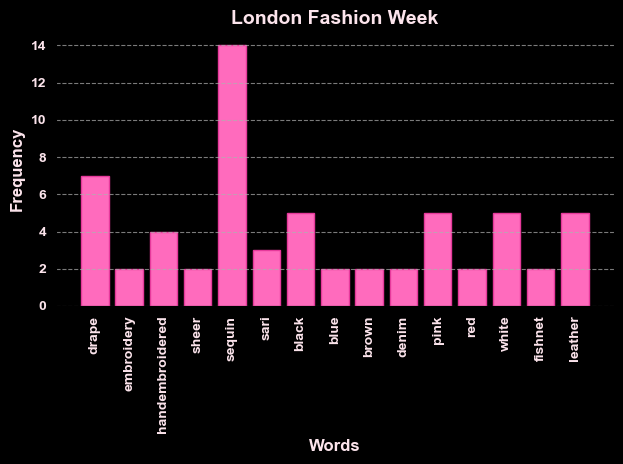

In [47]:
import os
import pandas as pd

def count_word_frequency(text_document, word_list):
    """
    Count the frequency of words from the given list in the text document.

    Parameters:
    - text_document (str): The input text document.
    - word_list (list): The list of words to match and count.

    Returns:
    - dict: A dictionary containing word-frequency pairs.
    """
    # Tokenize the text document into words
    words_in_document = text_document.lower().split()

    # Count the frequency of each word in the text document for the specified list
    word_frequency = {word: words_in_document.count(word) for word in word_list}

    return word_frequency

# Specify the filename of your text document
file_name = "lfw_l.txt"

# Read the contents of the text document
with open(file_name, 'r', encoding='utf-8') as file:
    document_content = file.read()

if document_content:
    # Specify your list of words
    word_list

    # Count the frequency of words in the specified list
    result = count_word_frequency(document_content, word_list)

    # Filter out values greater than 1
    filtered_result = {word: count for word, count in result.items() if count > 1}

    # Print the filtered word frequency
    print("Filtered Word Frequency:")
    print(filtered_result)

font = {'family': 'Arial', 'weight': 'bold', 'size': 12}

# Set the font family and weight for the entire plot
plt.rc('font', **font)

background_color = '#000000'  # Black background
fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Adjusted bar colors and added edge color for better visibility
plt.bar(filtered_result.keys(), filtered_result.values(), color='#FF6BBD', edgecolor='#E6399B')

# Set font color to light pink
font_color = '#FCE4EC'

plt.xlabel('Words', fontsize=12, color=font_color, weight='bold')
plt.ylabel('Frequency', fontsize=12, color=font_color, weight='bold')
plt.title('London Fashion Week', fontsize=14, fontweight='bold', color=font_color)  # Improved title styling
plt.xticks(rotation='vertical', fontsize=10, color=font_color, weight='bold')

# Set the y-axis tick positions and labels
plt.yticks(fontsize=10, color=font_color, weight='bold')

# Added grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

